## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
# Create path
path = r'D:\ドキュメント\Study\CareerFoundry\Achievement 6'

In [4]:
# Import the recipes data.

df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','vehicle loan customer_cleansed.csv'), index_col = False)

## 2. Wrangling

In [5]:
# creat data frame with only defaulted customers

defaulter = df[df['loan_default']==True]

In [6]:
# shows all columns

pd.set_option('display.max_columns', 50)

In [7]:
defaulter.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
1,537409,47145,65550,73.23,67,31-07-85,Self employed,26-09-18,6,True,True,False,False,False,False,598,I-Medium Risk,1,1,1,27600,50200,50200,1991,0,1,1yrs 11mon,1yrs 11mon,0,True
3,624493,57513,66113,88.48,67,30-12-93,Self employed,26-10-18,6,True,True,False,False,False,False,305,L-Very High Risk,3,0,0,0,0,0,31,0,0,0yrs 8mon,1yrs 3mon,1,True
4,539055,52378,60300,88.39,67,09-12-77,Self employed,26-09-18,6,True,True,False,False,False,False,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,True
10,548567,53278,61230,89.83,67,01-01-79,Self employed,29-09-18,6,True,True,False,False,False,False,300,M-Very High Risk,1,0,0,0,0,0,2270,0,0,0yrs 7mon,0yrs 7mon,0,True
12,478647,53278,61330,89.68,67,01-06-74,Salaried,30-08-18,6,True,False,False,True,False,False,300,M-Very High Risk,7,2,1,0,69900,69900,3300,0,0,1yrs 3mon,2yrs 9mon,0,True


In [8]:
sub = defaulter[['asset_cost', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'NO.OF_INQUIRIES']]

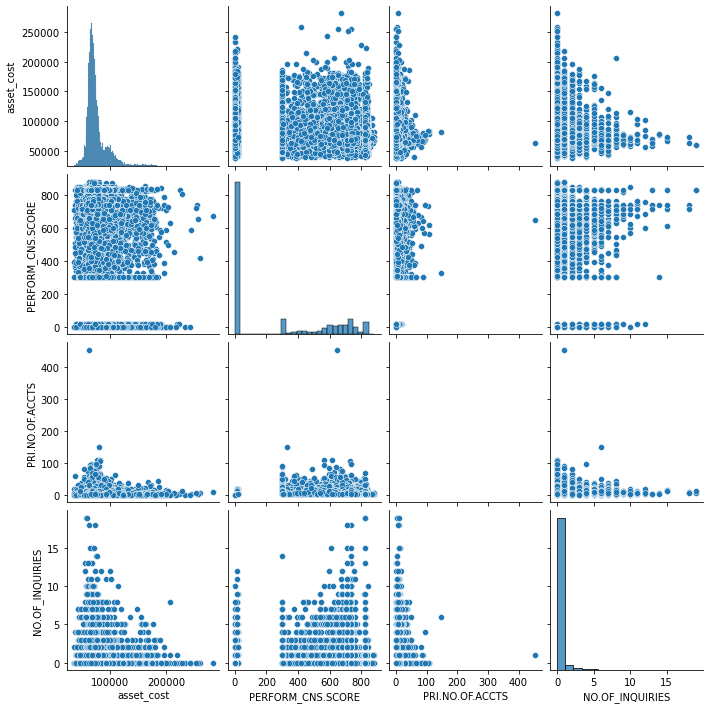

In [9]:
# Create a pair plot 

g = sns.pairplot(sub)

C:\Users\kenta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


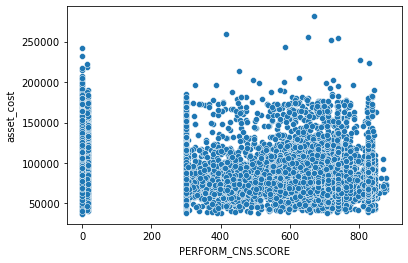

In [10]:
sns.scatterplot(sub['PERFORM_CNS.SCORE'], sub['asset_cost'])
plt.show()

In [13]:
sub.head()

,asset_cost,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,NO.OF_INQUIRIES
1,65550,598,1,0
3,66113,305,3,1
4,60300,0,0,1
10,61230,300,1,0
12,61330,300,7,0


In [14]:
over200 = sub[sub['PERFORM_CNS.SCORE']>200]

C:\Users\kenta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


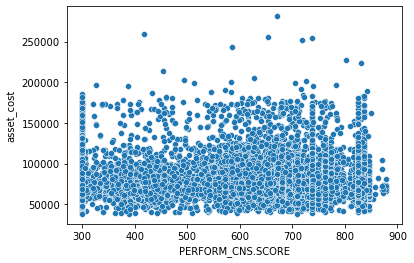

In [16]:
sns.scatterplot(over200['PERFORM_CNS.SCORE'], over200['asset_cost'])
plt.show()

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(over200).score(over200) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-7210902029290.264,
 -2736307337177.1978,
 -1464116887136.239,
 -883405936240.834,
 -644811400375.3302,
 -475924838134.0188,
 -375561799896.8535,
 -305310833265.83704,
 -249131039791.78912]

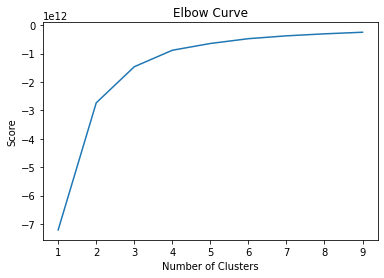

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The optimal count for your clusters is four

### 3. k-means clustering

In [23]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [24]:
# Fit the k-means object to the data.

kmeans.fit(over200)

C:\Users\kenta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [25]:
over200['clusters'] = kmeans.fit_predict(over200)

C:\Users\kenta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-25-fb46ca8444dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over200['clusters'] = kmeans.fit_predict(over200)


In [26]:
over200.head()

,asset_cost,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,NO.OF_INQUIRIES,clusters
1,65550,598,1,0,3
3,66113,305,3,1,3
10,61230,300,1,0,3
12,61330,300,7,0,3
13,57010,738,10,4,3


In [27]:
over200['clusters'].value_counts()

3    10012
0     7942
2     2385
1      457
Name: clusters, dtype: int64

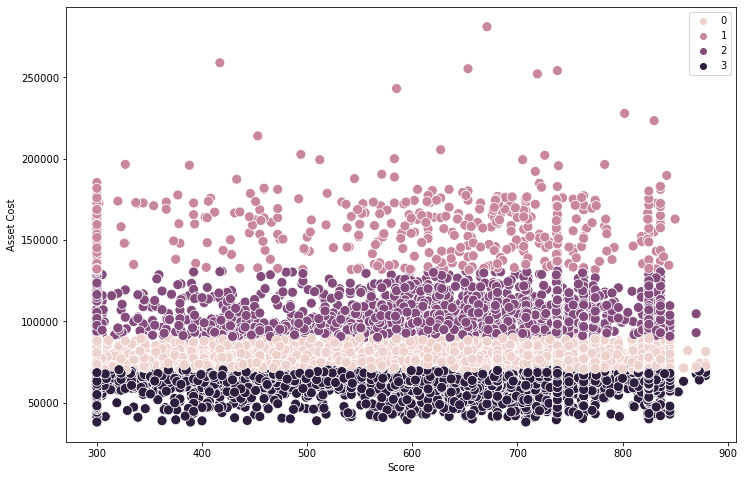

In [28]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=over200['PERFORM_CNS.SCORE'], y=over200['asset_cost'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Score') 
plt.ylabel('Asset Cost') 
plt.show()

In [30]:
over200.groupby('clusters').agg({'PERFORM_CNS.SCORE':['mean', 'median'], 'asset_cost':['mean', 'median']})

PERFORM_CNS.SCORE            asset_cost          
                      mean median           mean    median
clusters                                                  
0               611.578696    652   76416.716948   75200.0
1               590.461707    630  158963.601751  158314.0
2               615.961845    653  103252.563103  101258.0
3               611.834199    655   64102.326508   65315.5

The clusters categorised by the numner of assts cost.

Q. Propose what these results could be useful for in future steps of an analytics pipeline.

The result could be helpful if you want to divides into some groups from certain variables.